In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import os
from GetData import getSubjects, getData
import numpy as np
from mne_bids import BIDSPath, read_raw_bids
from plotElectrodes import sortCorrMaps
from functions.orderFilterMap import orderFilterMaps

In [8]:
# Change these variables to work for your block
subj = 'sub-22'
sess = 'iemu'
task = 'film' # 'rest'
acq = 'clinical'
run = '1'
data_dir = "/home/jovyan/ieegmovie_data"
fmricorr_dir =  f'{data_dir}/derivatives/fmricorr'  
ieegcorr_dir = f'{data_dir}/derivatives/corrMaps'

hg_dir=f'{ieegcorr_dir}/HighGamma/'
car_dir=f'{ieegcorr_dir}/CAR/'
alpha_dir=f'{ieegcorr_dir}/alpha/'
theta_dir=f'{ieegcorr_dir}/theta/'

In [4]:
subjects=getSubjects(data_dir)

In [ ]:
subj_data=getData(subj, data_dir, sess, task, acq, run)

Opening raw data file /home/jovyan/ieegmovie_data/derivatives/HighGamma/sub-07_ses-iemu_task-film_acq-clinical_run-1_HighGamma_raw.fif...
Isotrak not found
    Range : 0 ... 42893 =      0.000 ...   428.930 secs
Ready.
Opening raw data file /home/jovyan/ieegmovie_data/derivatives/HighGamma/sub-07_ses-iemu_task-film_acq-clinical_run-1_HighGamma_raw.fif...
Isotrak not found
    Range : 0 ... 42893 =      0.000 ...   428.930 secs
Ready.
sub-07 not found
Opening raw data file /home/jovyan/ieegmovie_data/derivatives/HighGamma/sub-09_ses-iemu_task-film_acq-clinical_run-1_HighGamma_raw.fif...
sub-09 not found
Opening raw data file /home/jovyan/ieegmovie_data/derivatives/HighGamma/sub-14_ses-iemu_task-film_acq-clinical_run-1_HighGamma_raw.fif...
sub-14 not found
Opening raw data file /home/jovyan/ieegmovie_data/derivatives/HighGamma/sub-16_ses-iemu_task-film_acq-clinical_run-1_HighGamma_raw.fif...
Isotrak not found
    Range : 0 ... 39099 =      0.000 ...   390.990 secs
Ready.
Opening raw data

/home/jovyan/ieegmovie/codes/plotElectrodes.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(20,10))


Opening raw data file /home/jovyan/ieegmovie_data/derivatives/HighGamma/sub-51_ses-iemu_task-film_acq-clinical_run-1_HighGamma_raw.fif...
Isotrak not found
    Range : 0 ... 40499 =      0.000 ...   404.990 secs
Ready.
sub-51 not found
Opening raw data file /home/jovyan/ieegmovie_data/derivatives/HighGamma/sub-55_ses-iemu_task-film_acq-clinical_run-1_HighGamma_raw.fif...
Isotrak not found
    Range : 0 ... 39741 =      0.000 ...   397.410 secs
Ready.
Opening raw data file /home/jovyan/ieegmovie_data/derivatives/HighGamma/sub-55_ses-iemu_task-film_acq-clinical_run-1_HighGamma_raw.fif...
Isotrak not found
    Range : 0 ... 39741 =      0.000 ...   397.410 secs
Ready.
sub-55 not found
Opening raw data file /home/jovyan/ieegmovie_data/derivatives/HighGamma/sub-60_ses-iemu_task-film_acq-clinical_run-1_HighGamma_raw.fif...
Isotrak not found
    Range : 0 ... 39172 =      0.000 ...   391.720 secs
Ready.
Opening raw data file /home/jovyan/ieegmovie_data/derivatives/HighGamma/sub-60_ses-iemu_ta

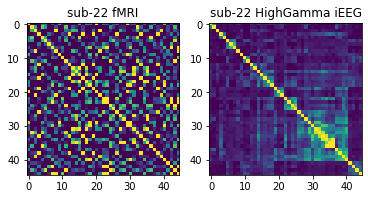

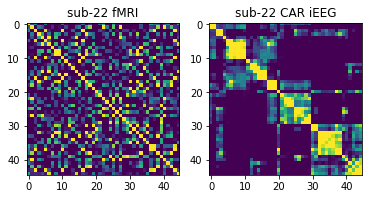

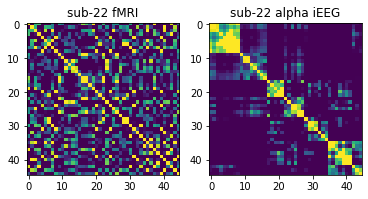

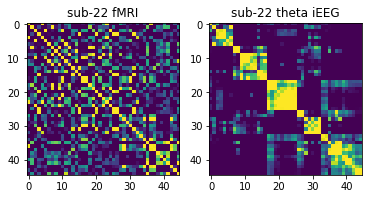

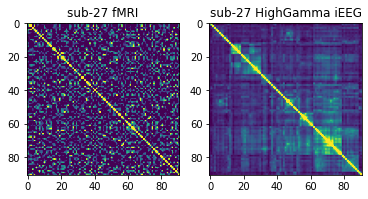

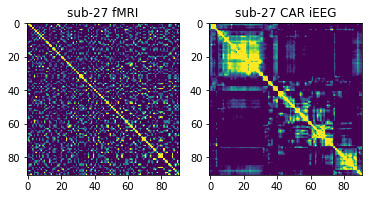

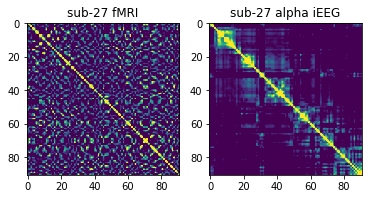

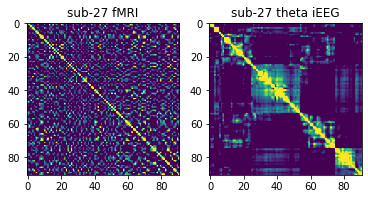

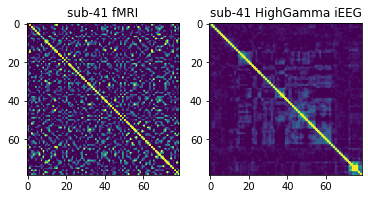

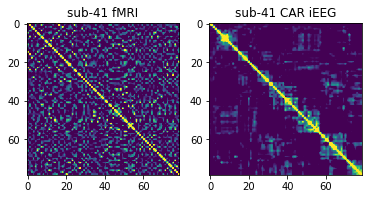

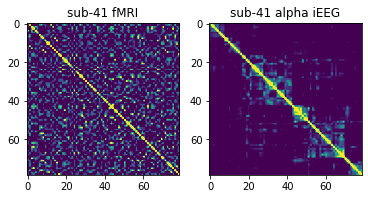

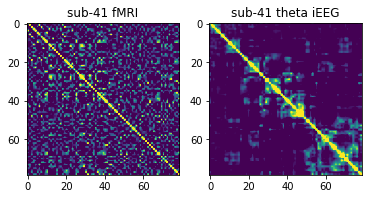

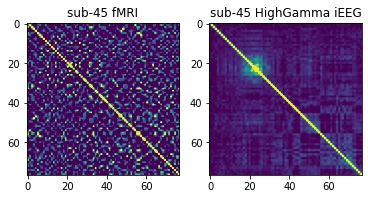

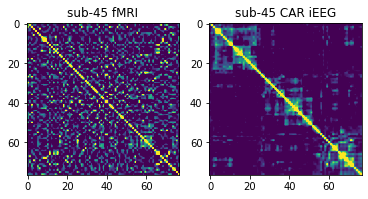

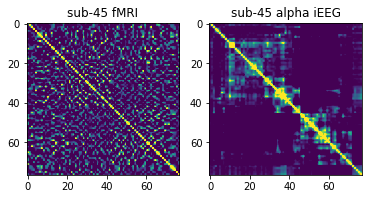

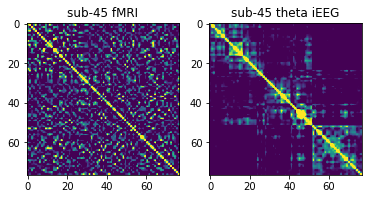

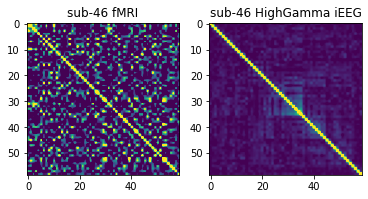

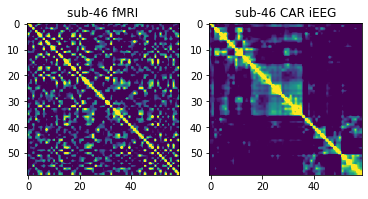

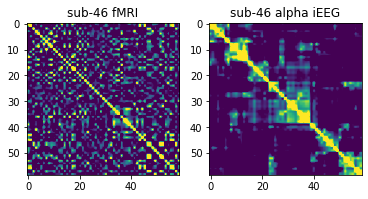

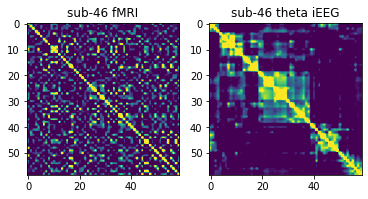

In [7]:
#load iEEG data
for subj in subjects:
    try:
        subj_data=getData(subj, data_dir, sess, task, acq, run)
        elecs=subj_data.getHGData().info.ch_names
        for freq in ["HighGamma", "CAR", "alpha", "theta"]:
            freq_dir=f'{ieegcorr_dir}/'+freq+'/'
            for file in os.listdir(freq_dir):
                if file.startswith(subj) and task in file:
                    freq_dat=np.load(freq_dir+file)
            chanOrder = sortCorrMaps(subj,freq_dat,freq, elecs)
            [elec, fmri, ieeg] = orderFilterMaps(data_dir, subj.strip('subj-'), sess, task, acq, run, freq, chanOrder)
            fig, axs = plt.subplots(1,2)
            axs[0].imshow(fmri, clim=(0,0.5))
            axs[0].set_title(subj + " fMRI")

            #axs.set_xticklabel(chanOrder)
            axs[1].imshow(ieeg, clim=(0,0.5))
            axs[1].set_title(subj +" "+ freq +" iEEG")
    except:
        print (subj+ " not found")



